In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

DATA CLEANING

In [3]:
df = pd.read_csv("/content/ds_salaries.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.shape

(607, 11)

In [5]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.duplicated().sum()

42

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(565, 11)

In [12]:
df.drop(["salary", "salary_currency"], axis = 1, inplace = True)

In [13]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [14]:
df.shape

(565, 9)

DATA REPRESENTATION

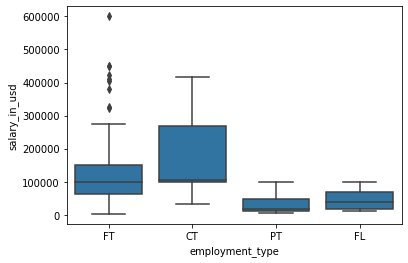

In [15]:
sb.boxplot(data=df, x="employment_type", y="salary_in_usd", color = sb.color_palette()[0])

<Figure size 216x216 with 0 Axes>

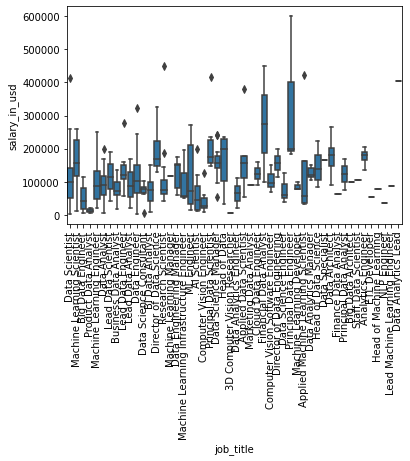

<Figure size 216x216 with 0 Axes>

In [16]:
sb.boxplot(data=df, x="job_title", y="salary_in_usd", color = sb.color_palette()[0])
plt.xticks(rotation=90);
plt.figure(figsize=(3, 3))
#plt.rcParams["figure.figsize"] = [10, 15]

In [17]:
# to show content dataset 
print(df['experience_level'].unique())
print(df['company_size'].unique())
print(df['employment_type'].unique())

['MI' 'SE' 'EN' 'EX']
['L' 'S' 'M']
['FT' 'CT' 'PT' 'FL']


In [18]:
# converting all data set from strings to numerical 
df["employType_Num"] = df['employment_type'].replace(['FT', 'FL', 'PT', 'CT'],[4,3,2,1])
df["compSize_Num"] = df['company_size'].replace(['L','M','S'],[3,2,1])
df['level_Num'] = df['experience_level'].replace(['EX', 'SE', 'MI' , 'EN'], [9,8,7,6])
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employType_Num,compSize_Num,level_Num
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,4,3,7
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,4,1,8
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,4,2,8
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,4,1,7
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,4,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M,4,2,8
603,2022,SE,FT,Data Engineer,126000,US,100,US,M,4,2,8
604,2022,SE,FT,Data Analyst,129000,US,0,US,M,4,2,8
605,2022,SE,FT,Data Analyst,150000,US,100,US,M,4,2,8


In [19]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employType_Num,compSize_Num,level_Num
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,4,3,7
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,4,1,8
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,4,2,8
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,4,1,7
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,4,3,8


Heatmap plotting.

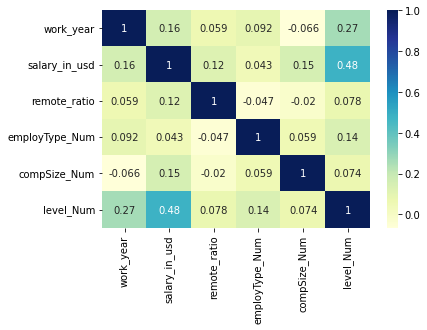

In [20]:

# 3. Plot the heatmap
dataplot=sb.heatmap(df.corr(),cmap="YlGnBu",annot=True)

Line Chart plotting 

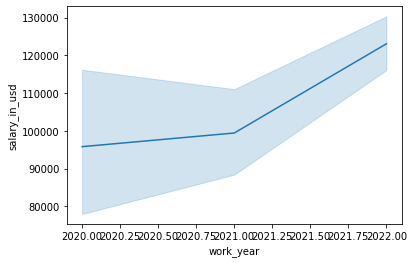

In [21]:
# reading the database 
sb.lineplot(x='work_year', y='salary_in_usd', data=df)
plt.show()
plt.rcParams["figure.figsize"] = [10, 10]

In [22]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employType_Num,compSize_Num,level_Num
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,4,3,7
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,4,1,8
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,4,2,8
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,4,1,7
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,4,3,8


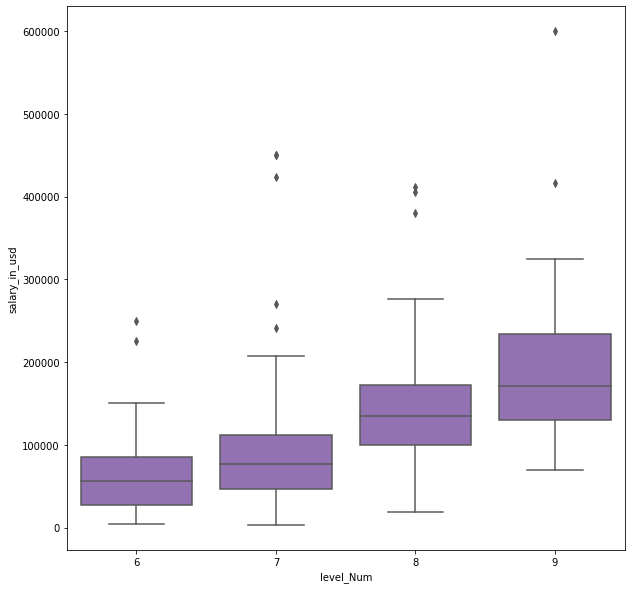

In [23]:
sb.boxplot(data=df, x="level_Num", y="salary_in_usd", color = sb.color_palette()[4])

In [24]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
employType_Num        0
compSize_Num          0
level_Num             0
dtype: int64

In [25]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employType_Num,compSize_Num,level_Num
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,4,3,7
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,4,1,8
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,4,2,8
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,4,1,7
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,4,3,8


In [26]:
pd.crosstab(df["experience_level"], df["employment_type"] ,normalize=False)


employment_type,CT,FL,FT,PT
experience_level,,,,
EN,2,0,79,7
EX,1,0,25,0
MI,1,3,201,3
SE,1,1,241,0


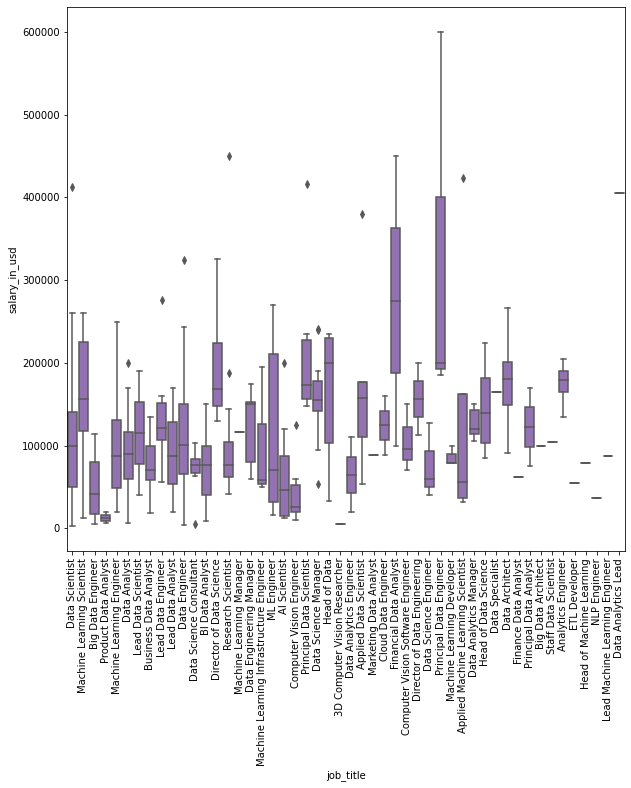

In [27]:
sb.boxplot(data=df, x="job_title", y="salary_in_usd", color = sb.color_palette()[4])
plt.xticks(rotation=90);
plt.rcParams["figure.figsize"] = [15, 10]

Clustered Bar charts.

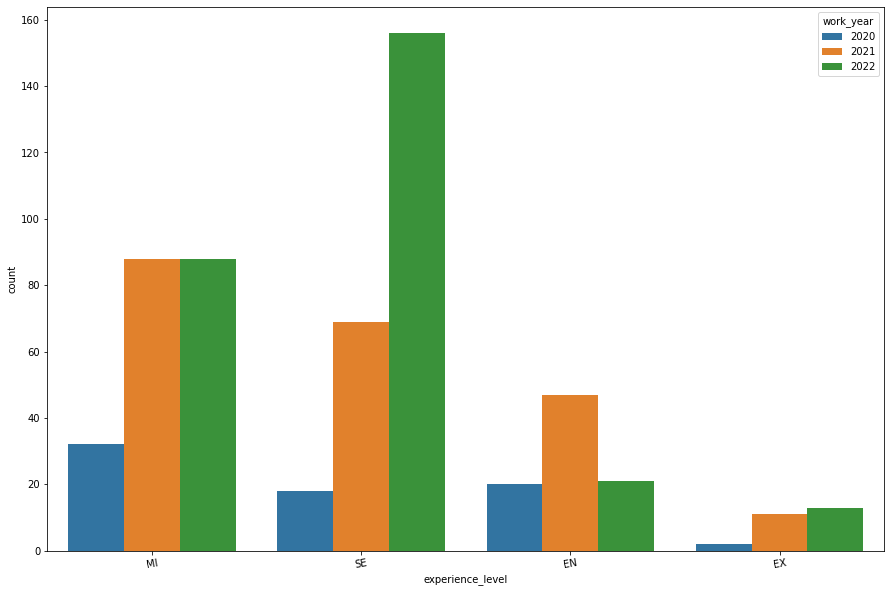

In [28]:
sb.countplot(data = df, x = 'experience_level', hue = 'work_year') 
plt.xticks(rotation=10);

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary_in_usd       565 non-null    int64 
 5   employee_residence  565 non-null    object
 6   remote_ratio        565 non-null    int64 
 7   company_location    565 non-null    object
 8   company_size        565 non-null    object
 9   employType_Num      565 non-null    int64 
 10  compSize_Num        565 non-null    int64 
 11  level_Num           565 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 73.5+ KB


In [30]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employType_Num,compSize_Num,level_Num
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,4,3,7
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,4,1,8
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,4,2,8
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,4,1,7
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,4,3,8


In [31]:
# one hot enducding to change rest of  string data set .
df = pd.get_dummies(df, columns = ['job_title', 'employee_residence', 'company_location'])


Model Fitting

In [32]:
df.head()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,employType_Num,compSize_Num,level_Num,job_title_3D Computer Vision Researcher,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,2020,MI,FT,79833,0,L,4,3,7,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,SE,FT,260000,0,S,4,1,8,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,SE,FT,109024,50,M,4,2,8,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,MI,FT,20000,0,S,4,1,7,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,SE,FT,150000,50,L,4,3,8,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
newDataset = df.drop(columns=["experience_level", "employment_type", "company_size"])

In [34]:
newDataset

,work_year,salary_in_usd,remote_ratio,employType_Num,compSize_Num,level_Num,job_title_3D Computer Vision Researcher,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,2020,79833,0,4,3,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,260000,0,4,1,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,109024,50,4,2,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,20000,0,4,1,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,150000,50,4,3,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,100,4,2,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
603,2022,126000,100,4,2,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
604,2022,129000,0,4,2,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
605,2022,150000,100,4,2,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
X = newDataset
Y = df['salary_in_usd']

In [36]:
X

,work_year,salary_in_usd,remote_ratio,employType_Num,compSize_Num,level_Num,job_title_3D Computer Vision Researcher,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,2020,79833,0,4,3,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,260000,0,4,1,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,109024,50,4,2,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,20000,0,4,1,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,150000,50,4,3,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,100,4,2,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
603,2022,126000,100,4,2,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
604,2022,129000,0,4,2,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
605,2022,150000,100,4,2,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
Y

0       79833
1      260000
2      109024
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary_in_usd, Length: 565, dtype: int64

Linear Regression Model

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)
# y test used in accuraccy

In [39]:
#fitting using regresssin library
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
classifier = regressor.fit(X_train, Y_train)

In [45]:
classifier.score(X_train, Y_train)

1.0

In [46]:
y_pred = classifier.predict((X_test))

In [47]:
y_pred

array([165000., 100000.,   9466., 423000.,  43966.,  25532.,  93150.,
       120000., 175000.,  36643., 135000.,  31875., 150000.,  25000.,
        12103.,  61300.,  40000.,  49461., 158200.,  62000., 150000.,
        70000.,  53192., 416000.,  16228., 250000., 180000., 141300.,
       115000., 270000.,   9272., 241000.,  51321., 132320.,  85000.,
       109280.,  90000.,  39263.,  98158.,  76833., 230000.,  90000.,
       213120., 256000., 105000., 100000.,  28369., 102100.,   5679.,
       165000., 216000.,  38400.,  67000.,   8000., 115000., 266400.,
       132000.,  85000., 114047., 110000., 137141.,  49268., 200000.,
       155000.,  15966., 220000., 205300.,  96113.,  50000.,  69000.,
        58894.,  78526., 170000., 200000.,  76958., 120000., 174000.,
         6072.,  80000.,  71982., 152000., 209100.,  18053., 135000.,
        42197.,  88654., 160080.,  28476., 205300.,  46597.,  81666.,
       144000., 102839.,  36259., 150000.,  70500., 243900.,  20000.,
        12000.,  955

Logistic Regression Model

In [48]:
y_pred_f = classifier.predict((X_test))

In [57]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred)
print("R2 score :", r2)

from sklearn.metrics import mean_squared_error

error_test = np.sqrt(mean_squared_error(Y_test, y_pred))

print('RMSE for test = ',error_test)

R2 score : 1.0
RMSE for test =  7.083223853066604e-11


In [52]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y[:189],Y_test)

13275923760.375662